<a href="https://colab.research.google.com/github/HRJ369/CL329/blob/main/CL329_coding_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

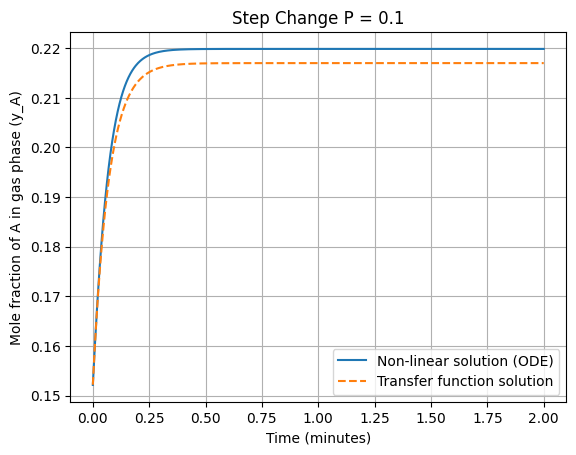

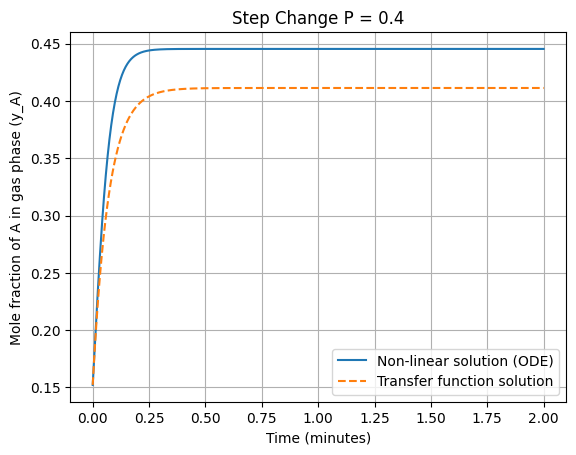

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


'''We have solved this question considering the system was at steady state before changing Ya,i by P'''
# Constants
rho = 0.02  # mol/L
V = 10      # Reactor volume in L
F = 1       # Liquid molar flow rate (mol/min)
G = 0.5     # Gas molar flow rate (mol/min)
keq = 80    # Equilibrium constant
yai_initial = 0.4   # Initial inlet mole fraction of A in gas phase (steady state)
xa_steady = 0.1239  # Steady state value of xa

# Function to represent the non-linear ODE system
def absorption_ode(t, xa, P):
    # yAi changes by step P at t = 0
    yai = yai_initial + P  # Inlet mole fraction with the step change applied
    # yA as a function of xA (non-linear relationship)
    ya = keq * xa**3
    # Differential equation: d(xa)/dt
    dxa_dt = (-F * xa + G * (yai - ya)) / (rho * V)
    return dxa_dt

# Function for the transfer function approach solution
def transfer_function_solution(t, P):
    return P * 0.648 * (1 - np.exp(-t / 0.07)) + 0.1522 #adding 0.1522 as we are taking system to be in steady state initially ie at t=0

# Initial condition and time span for the ODE solver
xa0 = xa_steady  # Initial condition (steady state value of xa)
t_span = (0, 2)  # Time span for integration (minutes)
t_eval = np.linspace(0, 2, 1000)  # Time points for evaluation

# Step changes in yAi
P_values = [0.1, 0.4]

for P in P_values:
    # Solve the non-linear ODE with the step change in yAi
    sol = solve_ivp(absorption_ode, t_span, [xa0], args=(P,), t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-8)


    # Get xa(t) and compute ya(t) from xa(t)
    xa_sol = sol.y[0]
    ya_sol = keq * xa_sol**3

    # Compute the transfer function solution
    ya_transfer = transfer_function_solution(t_eval, P)

    # Plot the results
    plt.figure()
    plt.plot(t_eval, ya_sol, label='Non-linear solution (ODE)')
    plt.plot(t_eval, ya_transfer, label='Transfer function solution', linestyle='--')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Mole fraction of A in gas phase (y_A)')
    plt.title(f'Step Change P = {P}')
    plt.legend()
    plt.grid(True)
    plt.show()

Enter the value of Kc: -200
Enter the value of tau(l): 0.2


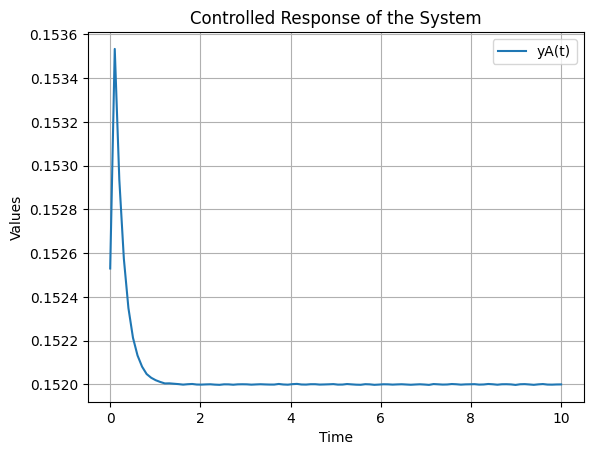

In [22]:

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def coupled_odes(t, y, Kc, tau_l, P):
    F, xA, e = y
    G = 0.5  # Define G based on your system
    rho = 0.02  # Define density based on your system
    V = 10  # Define volume based on your system
    Keq = 80  # Define equilibrium constant based on your system

    yA1 = 0.4 + P  # Calculate yA1

    # Define the equations

    dxA_dt = (-F * xA + G * (yA1 - Keq * xA**3)) / (rho * V)
    de_dt = -3 * Keq * xA**2 * dxA_dt
    dF_dt = Kc * de_dt + (Kc / tau_l) * (0.152 - Keq*xA**3 )  # Using de/dt and e(t)


    return [dF_dt, dxA_dt, de_dt]

# Input values for Kc and tau_l
Kc = float(input("Enter the value of Kc: "))
tau_l = float(input("Enter the value of tau(l): "))

# Initial conditions
F0 = 1  # Initial condition for F
xA0 = 0.124  # Initial condition for xA
e0 = 0.0  # Initial condition for e
y0 = [F0, xA0, e0]

# Time span for the simulation
t_span = (0, 10)  # Adjust as needed
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODEs
solution = solve_ivp(coupled_odes, t_span, y0, args=(Kc, tau_l, 0.1), t_eval=t_eval)

# Plot the results
plt.figure()
#plt.plot(solution.t, solution.y[0], label='F(t)')
plt.plot(solution.t, 80*solution.y[1]**3 , label='yA(t)')
#plt.plot(solution.t, solution.y[2], label='e(t)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Controlled Response of the System')
plt.legend()
plt.grid()
plt.show()


Enter Kc value: -200
Enter Tau_l value: 0.2


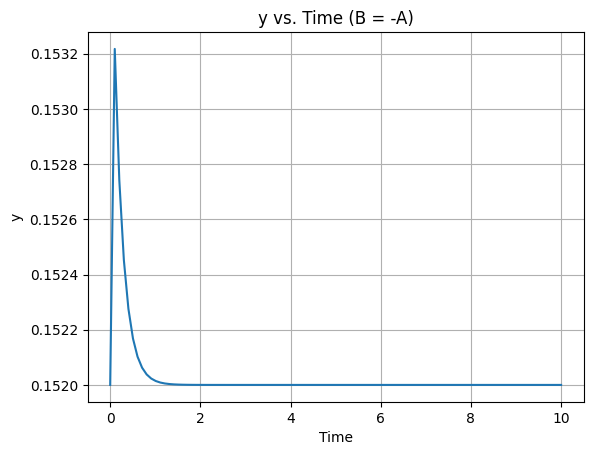

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to calculate P1, P2, A, and y
def calculate_y(Kc, Taul, P, t):
    # Calculate P1
    P1 = (-(1 - 0.161 * Kc) / 0.07 + math.sqrt(((1 - 0.161 * Kc) / 0.07) ** 2 + (9.2 * Kc) / Taul)) / 2

    # Calculate P2
    P2 = (-(1 - 0.161 * Kc) / 0.07 - math.sqrt(((1 - 0.161 * Kc) / 0.07) ** 2 + (9.2 * Kc) / Taul)) / 2

    # Calculate A
    A = 9.275 * P / (P1 - P2)

    # Set B = -A
    B = -A

    # Calculate y for each time t
    y = A * np.exp(P1 * t) + B * np.exp(P2 * t)+ 0.152
    return y

# Get inputs from the user
Kc = float(input("Enter Kc value: "))
Taul = float(input("Enter Tau_l value: "))
P =0.1  # Example value for P

# Time range for the plot
t_values = np.linspace(0, 10, 100)  # Time from 0 to 10 with 100 points

# Calculate y for each time value
y_values = calculate_y(Kc, Taul, P, t_values)

# Plot y vs. time
plt.plot(t_values, y_values)
plt.title("y vs. Time (B = -A)")
plt.xlabel("Time")
plt.ylabel("y")
plt.grid(True)
plt.show()




Enter Kc value: -650
Enter Tau_l value: 0.2


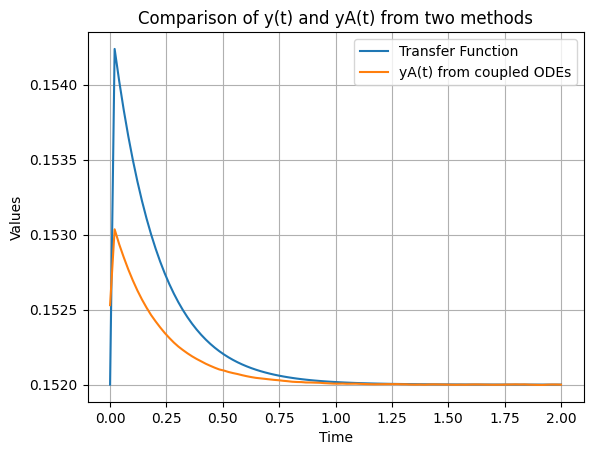

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp

# Function to calculate y = A*e^(P1*t) + B*e^(P2*t) + 0.152
def calculate_y(Kc, Taul, P, t):
    # Calculate P1
    P1 = (-(1 - 0.161 * Kc) / 0.07 + math.sqrt(((1 - 0.161 * Kc) / 0.07) ** 2 + (9.2 * Kc) / Taul)) / 2

    # Calculate P2
    P2 = (-(1 - 0.161 * Kc) / 0.07 - math.sqrt(((1 - 0.161 * Kc) / 0.07) ** 2 + (9.2 * Kc) / Taul)) / 2

    # Calculate A
    A = 9.275 * P / (P1 - P2)

    # Set B = -A
    B = -A

    # Calculate y for each time t
    y = A * np.exp(P1 * t) + B * np.exp(P2 * t) + 0.152
    return y

# Define the coupled ODEs system
def coupled_odes(t, y, Kc, tau_l, P):
    F, xA, e = y
    G = 0.5  # Define G based on your system
    rho = 0.02  # Define density based on your system
    V = 10  # Define volume based on your system
    Keq = 80  # Define equilibrium constant based on your system

    yA1 = 0.4 + P  # Calculate yA1

    # Define the equations
    dxA_dt = (-F * xA + G * (yA1 - Keq * xA**3)) / (rho * V)
    de_dt = -3 * Keq * xA**2 * dxA_dt
    dF_dt = Kc * de_dt + (Kc / tau_l) * (0.152 - Keq * xA**3)

    return [dF_dt, dxA_dt, de_dt]

# Input values for Kc and tau_l
Kc = float(input("Enter Kc value: "))
Taul = float(input("Enter Tau_l value: "))

# Initial conditions for the coupled ODEs
F0 = 1  # Initial condition for F
xA0 = 0.124  # Initial condition for xA
e0 = 0.0  # Initial condition for e
y0 = [F0, xA0, e0]

# Time span and evaluation points
t_span = (0, 2)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the coupled ODEs
solution = solve_ivp(coupled_odes, t_span, y0, args=(Kc, Taul, 0.1), t_eval=t_eval)

# Calculate y using the first method for the same time range
P = 0.4  # Example value for P in the calculate_y function
y_values = calculate_y(Kc, Taul, P, t_eval)

# Plot the results on the same graph
plt.plot(t_eval, y_values, label='Transfer Function')
plt.plot(solution.t, 80 * solution.y[1]**3, label='yA(t) from coupled ODEs')

# Customize the plot
plt.title('Comparison of y(t) and yA(t) from two methods')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()
